# Result Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Validate our results

As there is not a direct way to validate the results other than looking at the data, various workarounds have been created.

### Quantifying model performance
Measuring model performance by visually inspecting how often features are detected and removed. Figure 1 displays proportions of cases where at least one given feature was removed. Additionally, we can get rows IDs where a given feature were not removed, such that we can do some visual inspection of the database. As it is not feasable to check the entire dataset, this provides for a form of robust spot checking.

Amount of Features Removed:
 name_removed       1000
phone_removed       673
address_removed    1000
web_removed         891
ip_removed           98
zip_removed         680
date_removed        360
num_removed         672
dtype: int64


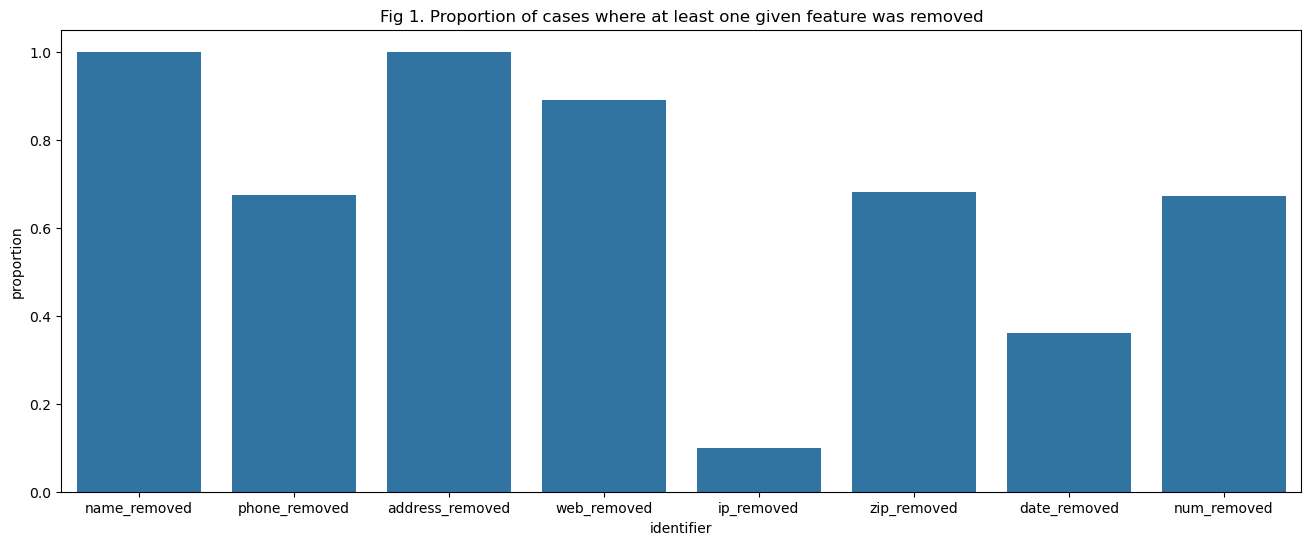

In [2]:
# load in our anonymized data
anonymized_data = pd.read_csv("output/call_data_anonymized.csv")
anonymized_results = anonymized_data.drop(columns=["time_of_call", "call_type", "call_transcription"])
anonymized_results

# assess narratives where at least one name was not removed
amt_features_removed = anonymized_results.apply(lambda x: (x != 0).sum()) ## change this clause x > 1
non_zero_prop = amt_features_removed/len(anonymized_results)
print("Amount of Features Removed:\n", amt_features_removed)

plt.figure(figsize=(16,6))
sns.barplot(non_zero_prop)
plt.title("Fig 1. Proportion of cases where at least one given feature was removed")
plt.ylabel('proportion')
plt.xlabel('identifier')
plt.show()

Amount of Features Removed:
 name_removed       1000
phone_removed       673
address_removed    1000
web_removed         891
ip_removed           98
zip_removed         680
date_removed        360
num_removed         672
dtype: int64


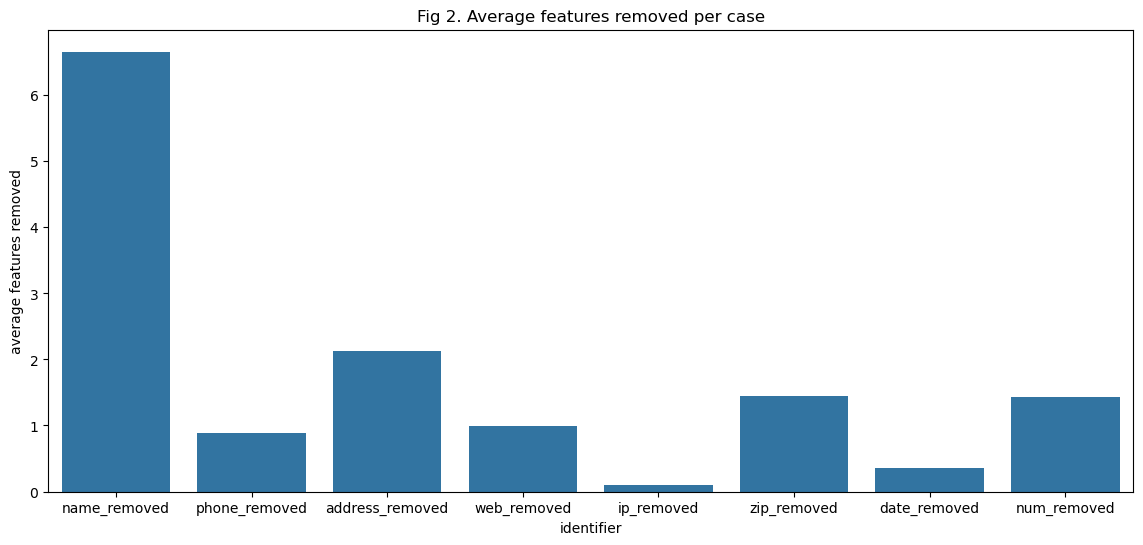

In [3]:
# assess narratives where at least one name was not removed
average_features_removed = anonymized_results.apply(np.mean)
non_zero_prop = amt_features_removed/len(anonymized_results)
print("Amount of Features Removed:\n", amt_features_removed)

plt.figure(figsize=(14,6))
sns.barplot(average_features_removed)
plt.title("Fig 2. Average features removed per case")
plt.ylabel('average features removed')
plt.xlabel('identifier')
plt.show()

In [4]:
anonymized_data[anonymized_data["name_removed"] > 1].shape[0]

1000

In [5]:
anonymized_data[anonymized_data["name_removed"] == 0]

,time_of_call,call_type,call_transcription,name_removed,phone_removed,address_removed,web_removed,ip_removed,zip_removed,date_removed,num_removed


In [6]:
for i, narrative in enumerate(anonymized_data["call_transcription"]):
    print(f"Narrative {i+1}:")
    print(narrative)
    if i == 100:
        break

Narrative 1:
NAME name is NAME, NAME Davenport and NAME, andADDRESS am contacting you regarding NAME therapy sessions. We needed to report this NAME. I faxed to this address: +NUMBER-PHONE, and plan to call on PHONE. You can contactADDRESS at NAME@WEBSITEADDRESS PHONE.
Narrative 2:
Hi, this is NAME. I need to discuss the charges on NAME last NAME from NAME visit on NAME NUMBER. NAME insurance should have covered NAME behavioral therapy sessions. Please callADDRESS back at PHONEADDRESS emailADDRESS at NAME@WEBSITE. Also, the new address is ZIPADDRESS NUMBERADDRESS, NUMBER NAME, NAME, ZIP
Narrative 3:
Hi, this is NAME. I need to discuss the charges on NAME last NAME from NAME visit on DATE NUMBER. NAME insurance should have covered NAME behavioral therapy sessions. Please callADDRESS back at PHONEADDRESS emailADDRESS at NAME@WEBSITE. Also, the new address is ZIPADDRESS NUMBERADDRESS, NUMBER NAME, NAME, ZIP-NUMBER
Narrative 4:
This is NAME Irvine and NAME. I need to orderADDRESS new batch